# 1) Extract reviews of any product from           ecommerce website like amazon
# 2) Perform emotion mining

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from wordcloud import WordCloud
import string

In [2]:
# load Amazon as a dataframe
Boat = pd.read_csv('Amazonreviews_BoatRockerz450_Headphone.csv', sep='\t', header=None)
Boat.head()

,0
0,Reviews
1,Best battery backup sound aslo good ??
2,Good product awesome sound quality but noise c...
3,The body of the product like the side adjuster...
4,I wanted to use these headphones for a couple ...


In [3]:
Boat.drop(0, axis = 0, inplace = True)
Boat.head()

,0
1,Best battery backup sound aslo good ??
2,Good product awesome sound quality but noise c...
3,The body of the product like the side adjuster...
4,I wanted to use these headphones for a couple ...
5,Actually sound and other things are extremely ...


In [4]:
# remove the leading and trailing spaces from the text in the dataframe and create a list
reviews = Boat[0].str.strip().tolist()
reviews = [i for i in reviews if i] # remove empty strings
reviews[:10]

['Best battery backup sound aslo good ??',
 'Good product awesome sound quality but noise cancellation is bit dull Nice experience till now',
 'The body of the product like the side adjuster of the headphone is very poor quality material used so it will break soon. If you are travelling please use a headphone bag , otherwise your headphone will break. if you are a traveller it is not for you. If you are only using in home for office then it is best.',
 "I wanted to use these headphones for a couple of days before I posted a review, but I am truly impressed with the quality. First of all, it's BOAT. Second, it's sleek and has a beautiful matte finish. Easy to carry, light weight, and the ear cushions cover your ears quite well providing an excellent auditory experience. I even use these headphones to meditate, because of the noise-cancelling effect it has. I chose the Luscious Black and I could not be happier with my purchase.",
 "Actually sound and other things are extremely good ,but 

In [5]:
len(reviews)

10

In [6]:
# load spacy model
nlp = spacy.load('en_core_web_md')

In [7]:
# take one element of the list and pass it to the nlp model to get the spacy doc object
doc = nlp(reviews[4])

# Named Entity Recognition

In [8]:
# render spacy document with named entities highlighted
displacy.render(doc,style='ent',jupyter=True)

In [9]:
# pos tagging of all the tokens in the document
for token in doc:
    print(token.text, token.pos_)

Actually ADV
sound ADJ
and CCONJ
other ADJ
things NOUN
are AUX
extremely ADV
good ADJ
, PUNCT
but CCONJ
the DET
round NOUN
of ADP
ear NOUN
is AUX
very ADV
painful ADJ
after ADP
using VERB
10 NUM
minutes NOUN
' PART


In [10]:
# filter & extract only tokens which are nouns & verbs and create a list
nouns_verbs = [token.text for token in doc if token.pos_ in ['NOUN', 'VERB']] # list comprehension
nouns_verbs[:10]

['things', 'round', 'ear', 'using', 'minutes']

# Count Vectorizition

In [11]:
# count vectorization of nouns_verbs
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)

In [12]:
X

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [13]:
X.toarray()

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]], dtype=int64)

In [14]:
# display the count vectorized nouns_verbs using the vocabulary_ attribute of the Count VEctorizer object
cv.vocabulary_

{'things': 3, 'round': 2, 'ear': 0, 'using': 4, 'minutes': 1}

In [15]:
pd.DataFrame(cv.vocabulary_, index=[0]).T.sort_values(by=0, ascending=False)

,0
using,4
things,3
round,2
minutes,1
ear,0


In [16]:
# display the nouns_verbs words and their counts as a dataframe in descending order
nouns_verbs_df = pd.DataFrame(cv.vocabulary_, index=[0]).T.sort_values(0, ascending=False)

In [17]:
nouns_verbs_df

,0
using,4
things,3
round,2
minutes,1
ear,0


Text(0.5, 1.0, 'Top 5 nouns & verbs')

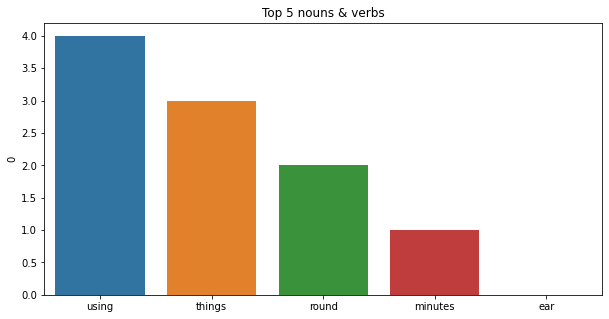

In [18]:
# bar charts of the top 5 nouns_verbs
plt.figure(figsize=(10,5))
sns.barplot(data=nouns_verbs_df.head(5), x=nouns_verbs_df.head(20).index, y=0)
plt.title('Top 5 nouns & verbs')

# Emotion Mining

In [19]:
# load the Afinn.csv dataset which contains the list of words and their sentiment scores
afinn = pd.read_csv('Afinn.csv',encoding='latin')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [20]:
# shape of the dataframe 
afinn.shape

(2477, 2)

In [21]:
# create a spacy doc fron the reviews list
doc=nlp(' '.join(reviews))

In [22]:
doc

Best battery backup sound aslo good ?? Good product awesome sound quality but noise cancellation is bit dull Nice experience till now The body of the product like the side adjuster of the headphone is very poor quality material used so it will break soon. If you are travelling please use a headphone bag , otherwise your headphone will break. if you are a traveller it is not for you. If you are only using in home for office then it is best. I wanted to use these headphones for a couple of days before I posted a review, but I am truly impressed with the quality. First of all, it's BOAT. Second, it's sleek and has a beautiful matte finish. Easy to carry, light weight, and the ear cushions cover your ears quite well providing an excellent auditory experience. I even use these headphones to meditate, because of the noise-cancelling effect it has. I chose the Luscious Black and I could not be happier with my purchase. Actually sound and other things are extremely good ,but the round of ear i

In [23]:
# a sample output of the sentence tokenization
for review in doc.sents:
    print(review)

Best battery backup sound aslo good ??
Good product awesome sound quality but noise cancellation is bit dull Nice experience till now The body of the product like the side adjuster of the headphone is very poor quality material used so it will break soon.
If you are travelling please use a headphone bag , otherwise your headphone will break.
if you are a traveller it is not for you.
If you are only using in home for office then it is best.
I wanted to use these headphones for a couple of days before I posted a review, but I am truly impressed with the quality.
First of all, it's BOAT.
Second, it's sleek and has a beautiful matte finish.
Easy to carry, light weight, and the ear cushions cover your ears quite well providing an excellent auditory experience.
I even use these headphones to meditate, because of the noise-cancelling effect it has.
I chose the Luscious Black and I could not be happier with my purchase.
Actually sound and other things are extremely good ,but the round of ear i

In [24]:
# create list of sentence tokens from the spacy document 
review = [review for review in doc.sents]
review

[Best battery backup sound aslo good ??,
 Good product awesome sound quality but noise cancellation is bit dull Nice experience till now The body of the product like the side adjuster of the headphone is very poor quality material used so it will break soon.,
 If you are travelling please use a headphone bag , otherwise your headphone will break.,
 if you are a traveller it is not for you.,
 If you are only using in home for office then it is best.,
 I wanted to use these headphones for a couple of days before I posted a review, but I am truly impressed with the quality.,
 First of all, it's BOAT.,
 Second, it's sleek and has a beautiful matte finish.,
 Easy to carry, light weight, and the ear cushions cover your ears quite well providing an excellent auditory experience.,
 I even use these headphones to meditate, because of the noise-cancelling effect it has.,
 I chose the Luscious Black and I could not be happier with my purchase.,
 Actually sound and other things are extremely good 

In [25]:
# set a word column of the afinn dataframe as the index and create a dictionary
afinn_scores=afinn.set_index('word')['value'].to_dict()
afinn_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [26]:
# using the above dictionary, create a function to calculate the sentiment score of each sentence
# the sentiment score of a sentence is the sum of the sentiment scores of all the words in the sentence
def sentiment_score(review):
    score  = 0
    sent_doc = nlp(review)
    for token in sent_doc:
        if token.text in afinn_scores:
            score += afinn_scores[token.text]
    return score

In [27]:
# sample sentence
sentiment_score('I am happy')

3

In [28]:
# calculate the sentiment score for each sentence in the sentences list using the above function
sentiment_scores = [sentiment_score(review.text) for review in review]
sentiment_scores[:10] # sample output

[3, 2, 1, 0, 3, 3, 0, 3, 3, -1]

In [29]:
# create a dataframe with the sentences and their sentiment scores
sentiment_df = pd.DataFrame({'Reviews':review, 'Sentiment_Score':sentiment_scores})
sentiment_df.head()

,Reviews,Sentiment_Score
0,"(Best, battery, backup, sound, aslo, good, ?, ?)",3
1,"(Good, product, awesome, sound, quality, but, ...",2
2,"(If, you, are, travelling, please, use, a, hea...",1
3,"(if, you, are, a, traveller, it, is, not, for,...",0
4,"(If, you, are, only, using, in, home, for, off...",3


In [30]:
sentiment_df.iloc[0,0]

Best battery backup sound aslo good ??

In [31]:
# sort the dataframe by the sentiment score in descending order
sentiment_df.sort_values('Sentiment_Score', ascending=False).head(10)

,Reviews,Sentiment_Score
11,"(Actually, sound, and, other, things, are, ext...",11
19,"(Hello, readers, ,, I, 'm, writing, this, revi...",8
26,"(It, might, be, worth, buying, your, grandma, ...",6
18,"(Budget, Headphones, ?, ?, ,, good, quality, o...",5
61,"(The, only, good, thing, about, these, cans, i...",4
29,"(It, is, n't, any, significant, improvement, o...",4
59,"(Save, up, some, money, ,, work, at, McDonalds...",3
45,"(It, 's, worth, noting, that, the, cups, do, n...",3
37,"(The, good, battery, life, means, nothing, if,...",3
24,"(The, boAt, Rockerz, line, is, boAt, 's, super...",3


In [32]:
# sort the dataframe by the sentiment score in descending order
sentiment_df.sort_values('Sentiment_Score', ascending=False).head(10)

,Reviews,Sentiment_Score
36,"(The, audio, sounds, horrible, ,, and, your, e...",-6
27,"(Sound, Quality, -, awful, .)",-3
22,"(but, I, 'm, not, sure, about, its, life, anym...",-3
28,"(Honestly, ,, the, boAt, Rockerz, 450, does, l...",-3
41,"(Build, Quality, -, In, a, word, -, bad, .)",-3
39,"(The, cans, are, very, small, ,, even, for, on...",-3
51,"(You, wo, n't, even, be, able, to, use, the, m...",-3
14,"(but, I, 'm, not, sure, about, its, life, anym...",-3
48,"(You'l, find, yourself, wanting, to, wash, the...",-2
49,"(It, 's, really, gross, .)",-2


In [33]:
#summary of sentiment scores
sentiment_df['Sentiment_Score'].describe().round(2)

count    62.00
mean      0.53
std       2.83
min      -6.00
25%      -1.00
50%       0.00
75%       2.75
max      11.00
Name: Sentiment_Score, dtype: float64

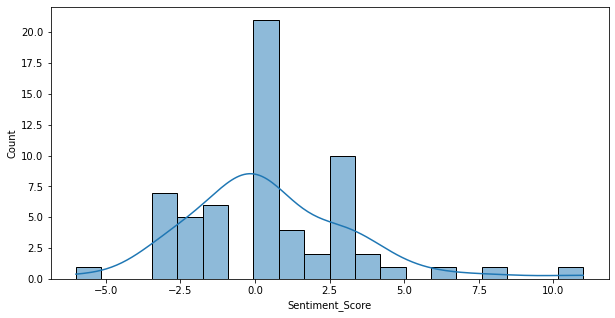

In [34]:
# distribution of sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(data=sentiment_df, x='Sentiment_Score', bins=20, kde=True);